In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

/Users/trungtv/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
data = pd.read_csv('dataset/studied_slept_passed.csv', names = ['Studied', 'Slept', 'Passed'])
data[['Studied', 'Slept', 'Passed']] = data[['Studied', 'Slept', 'Passed']].astype('float32')

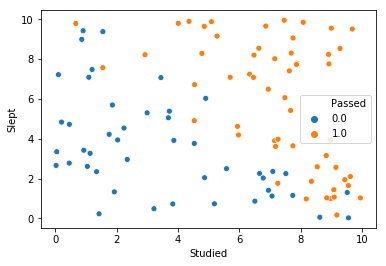

In [3]:
import seaborn as sns
sns.scatterplot(x="Studied", y="Slept", hue="Passed", data=data)

In [11]:
train, test = train_test_split(data, test_size=0.2)

In [4]:
#dataset_train = tf.data.Dataset.from_tensor_slices((train[['Studied', 'Slept']], train['Passed']))
dataset_train = tf.data.Dataset.from_tensor_slices((data[['Studied', 'Slept']], data['Passed']))

In [5]:
iterator = dataset_train.make_initializable_iterator()
X, Y = iterator.get_next()

In [6]:
# Let check if the iterator work
with tf.Session() as sess:
    sess.run(iterator.initializer) # initialize the iterator
    for i in range(50):
        x, y = sess.run((X,Y))
        print(x, y)

[4.8550644 9.639961 ] 1.0
[8.62544    0.05892653] 0.0
[3.8281915  0.72319925] 0.0
[7.1509547 3.8994205] 1.0
[6.4779005 8.19818  ] 1.0
[1.9222695 1.3314272] 0.0
[8.978216  0.9934375] 1.0
[6.635603 8.542803] 1.0
[7.672359 5.4164  ] 1.0
[4.8660154 2.0426712] 0.0
[6.861405 9.65531 ] 1.0
[8.5404215 2.5903742] 1.0
[3.7178807 5.381662 ] 0.0
[9.181297   0.17147465] 1.0
[9.56014    0.02494648] 0.0
[5.9713693 4.188302 ] 1.0
[9.438203  1.9438125] 1.0
[4.357551 9.887983] 1.0
[4.540332  6.7138734] 1.0
[1.5491016 9.375133 ] 0.0
[8.081974 9.842207] 1.0
[9.620465  2.0993276] 1.0
[8.834771 3.152204] 1.0
[1.7534485 4.2192426] 0.0
[1.0432129 2.609765 ] 0.0
[1.1963832 7.4757447] 0.0
[8.910069 8.232928] 1.0
[4.5296187 4.9055114] 1.0
[1.8591124 5.6918674] 0.0
[9.5571785 1.6446719] 1.0
[7.154701 8.014791] 1.0
[2.3436186 2.9587069] 0.0
[2.9226844 8.217595 ] 1.0
[6.333096 7.240305] 1.0
[0.9256282 3.421267 ] 0.0
[7.8743906 7.7910933] 1.0
[8.347751  1.8608125] 1.0
[5.5810614 2.4961293] 0.0
[5.091029 9.873134] 1.

In [7]:
num_features = 2
learning_rate = 0.01
training_epochs = 100

#tf.reset_default_graph()

# By aving 2 features: hours slept & hours studied
#X = tf.placeholder(tf.float32, [None, num_features], name="X")
#Y = tf.placeholder(tf.float32, [None, 1], name="Y")

# Initialize our weigts & bias
W = tf.get_variable("W", [num_features, 1], initializer = tf.contrib.layers.xavier_initializer())
#W = tf.get_variable("W", initializer = tf.fill([num_features, 1], 0.1)) #tf.constant([[0.1],[0.1]])
#W = tf.get_variable("W", initializer = tf.fill([num_features, 1], 0.1))
b = tf.get_variable("b", [1], initializer = tf.zeros_initializer())

In [8]:
d = tf.matmul(tf.reshape(X, [1, num_features]), W)

In [9]:
Z = tf.add(d, b)
prediction = tf.nn.sigmoid(Z)

Y_reshape = tf.reshape(Y, [1,1])
# Calculate the cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y_reshape))

# Use Adam as optimization method
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

cost_history = np.empty(shape=[1],dtype=float)

In [12]:
n_correct = 0
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        sess.run(iterator.initializer) # initialize the iterator
        try:
            while True:
                #_, c = sess.run([optimizer, cost], feed_dict={X: x_train, Y: y_train})
                _, c = sess.run([optimizer, cost])
        except tf.errors.OutOfRangeError:
            pass

        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
               "W=", sess.run(W), "b=", sess.run(b))
        cost_history = np.append(cost_history, c)
        
    
    sess.run(iterator.initializer) # initialize the iterator
    correct_prediction = tf.to_float(tf.greater(prediction, 0.5))
    for i in range(len(train)):
        tmp = sess.run(correct_prediction)
        if float(tmp) == 1.0:
            n_correct += 1
    print ("n_correct: {} / total: {} Train Accuracy {}".format(n_correct, len(train), n_correct/len(train)))

Epoch: 0001 cost= 1.563845754 W= [[-0.34832057]
 [ 0.4619176 ]] b= [0.21847515]
Epoch: 0002 cost= 1.226639986 W= [[-0.1402366 ]
 [ 0.27635002]] b= [0.07355963]
Epoch: 0003 cost= 0.894055367 W= [[-0.01073644]
 [ 0.1289205 ]] b= [-0.1150244]
Epoch: 0004 cost= 0.735560894 W= [[0.06958197]
 [0.06337001]] b= [-0.30204645]
Epoch: 0005 cost= 0.650755465 W= [[0.11591843]
 [0.04408954]] b= [-0.4885661]
Epoch: 0006 cost= 0.594539046 W= [[0.14527395]
 [0.04525163]] b= [-0.6732217]
Epoch: 0007 cost= 0.551063836 W= [[0.16700988]
 [0.05490092]] b= [-0.8544312]
Epoch: 0008 cost= 0.514309168 W= [[0.18537405]
 [0.06786024]] b= [-1.0312467]
Epoch: 0009 cost= 0.481806993 W= [[0.20216288]
 [0.08193548]] b= [-1.2031951]
Epoch: 0010 cost= 0.452459604 W= [[0.2181021 ]
 [0.09621896]] b= [-1.3700883]
Epoch: 0011 cost= 0.425709367 W= [[0.23347619]
 [0.11034597]] b= [-1.5319092]
Epoch: 0012 cost= 0.401215494 W= [[0.2483958 ]
 [0.12417591]] b= [-1.6887383]
Epoch: 0013 cost= 0.378729045 W= [[0.26290712]
 [0.137659

In [ ]:
    #print ("Train Accuracy:", accuracy.eval({X: x_train, Y: y_train}))
    print ("Train Accuracy:", accuracy.eval({X: X, Y: Y}))
    #print ("Test Accuracy:", accuracy.eval({X: x_test, Y: y_test}))


In [ ]:
w_hat

In [ ]:
b_hat

In [ ]:
data['Predicted'] = data['Studied'] * w_hat[0] + data['Slept'] * 

In [ ]:
len(data)